In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus as pydot
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
college_nba = pd.read_csv('stats/college_noname.csv', index_col = 0)

In [3]:
college_names = pd.read_csv('stats/collegenames.csv', index_col = 0)

In [4]:
features = college_nba.drop(['drafted'], axis = 1)

## Feature Importance

In [5]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'green') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [6]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'green')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

### Confusion Matrix Function Plot

In [7]:
labels = ['Drafted', 'Not Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Decision Tree Classification 

In [8]:
ctree = DecisionTreeClassifier(max_depth = 2)

In [9]:
# Feautures and Predicted
y = college_nba['drafted']

X  = features

In [10]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

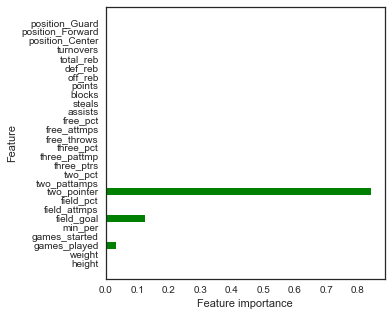

In [11]:
plot_feature_importances(ctree.fit(X_train, y_train))

### Cross Validation

In [59]:
ctree_cv_score = cross_val_score(ctree, X_train, y_train, cv=3)
mean_ctree_cv_score = np.mean(ctree_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_ctree_cv_score * 100))

Mean Cross Validation Score: 78.87%


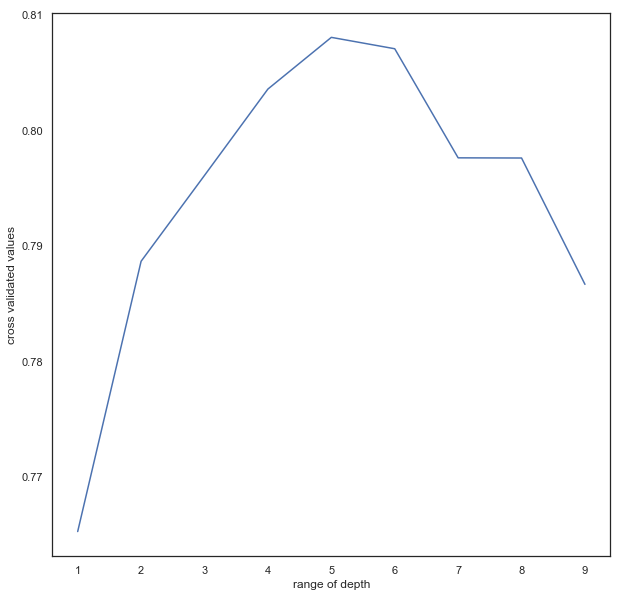

In [54]:
score = cross_val_score(ctree, X_train, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_train, y_train, cv = 10)
    val.append(depth_score.mean())
# print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

### Model Testing

In [49]:
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [166]:
success_failure

,not drafted,drafted
name,,
Alex Acker,0.109677,0.890323
Arron Afflalo,0.576923,0.423077
Cole Aldrich,1.000000,0.000000
Cliff Alexander,0.904762,0.095238
Al-Farouq Aminu,0.000000,1.000000
James Anderson,0.926448,0.073552
Kyle Anderson,0.794872,0.205128
Kyle Anderson,0.101695,0.898305
Ryan Anderson,0.926448,0.073552


In [145]:
predictions = pd.DataFrame(test_pred,index=X_test.index,columns = y_test.unique())

In [122]:
# predict the response for new observations
test_preds = ctree.predict(X_test)

In [37]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.7800201816347124

In [104]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Accuracy Score: 0.7840565085771948
Precision Score: 0.7142857142857143
Recall Score: 0.6268221574344023
F1 Score: 0.6677018633540373

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       648
           1       0.71      0.63      0.67       343

    accuracy                           0.78       991
   macro avg       0.76      0.75      0.75       991
weighted avg       0.78      0.78      0.78       991



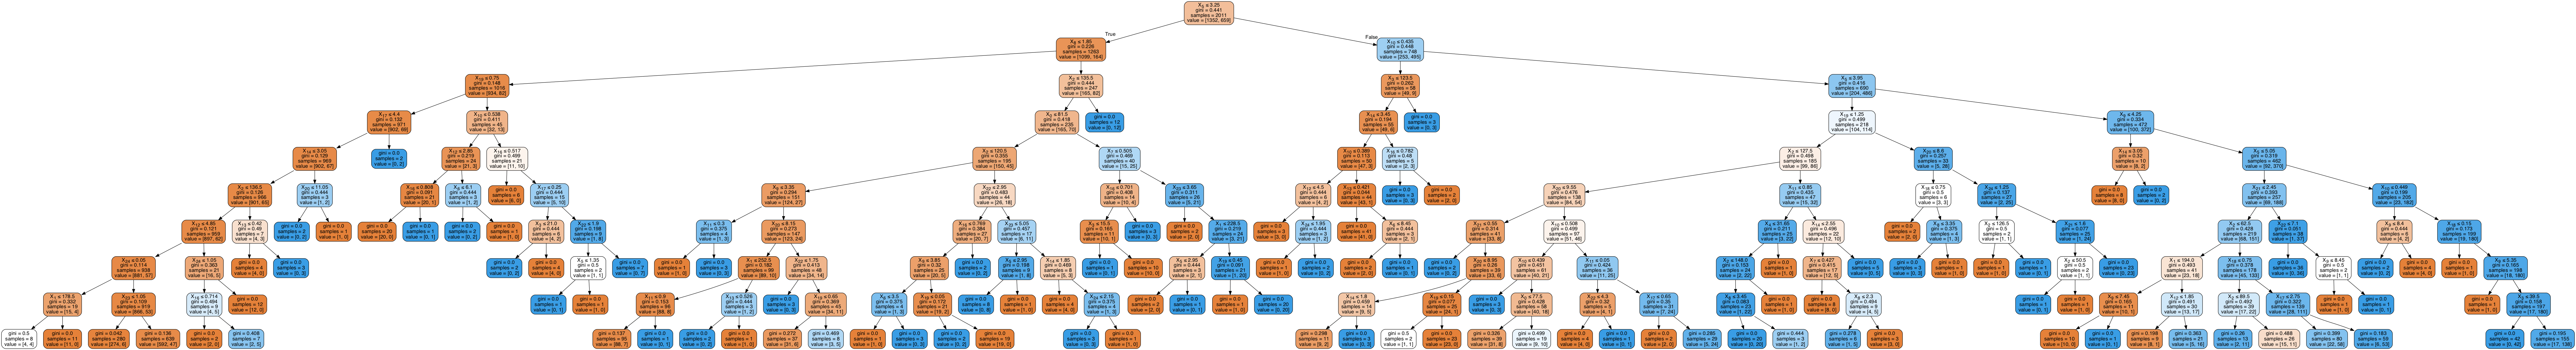

In [123]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

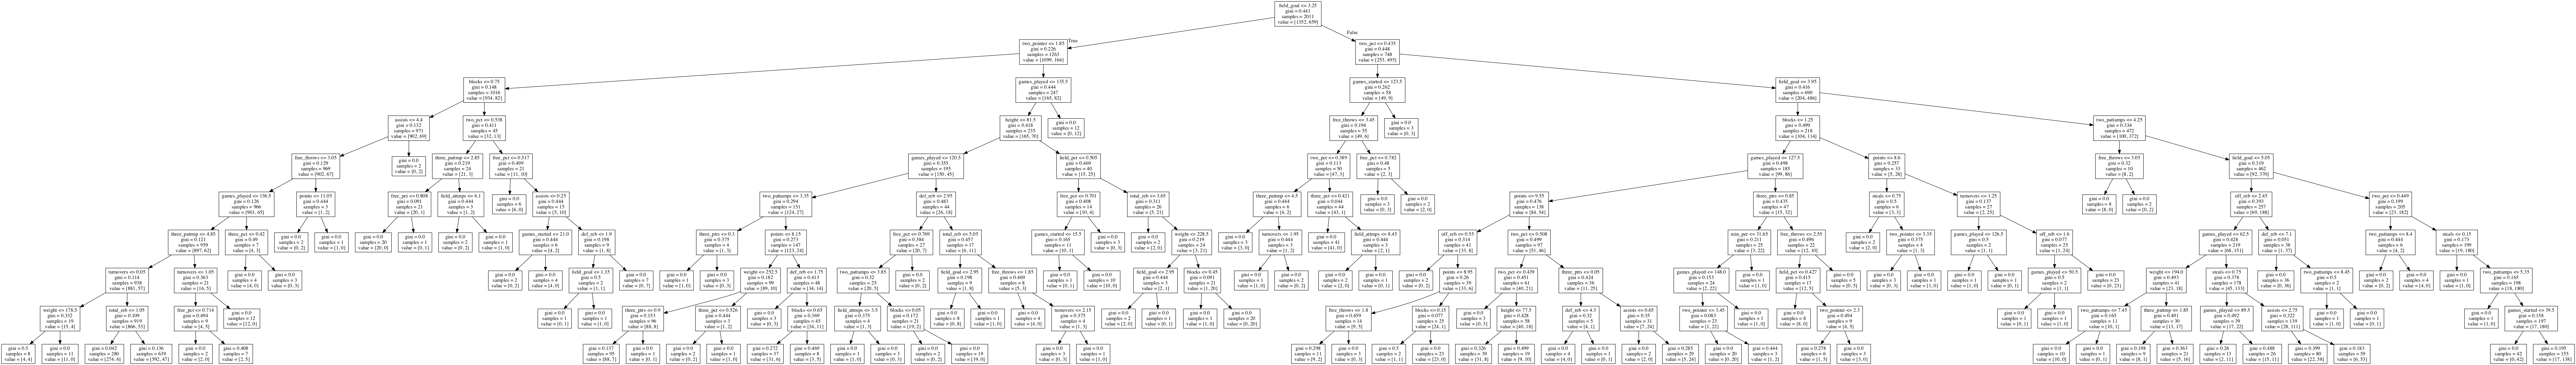

In [120]:
dot_data = StringIO()  
tree.export_graphviz(ctree, out_file=dot_data, feature_names= X.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Predicted    0    1  All
True                    
0          562   86  648
1          128  215  343
All        690  301  991


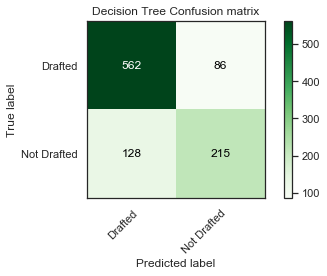

In [95]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Decision Tree Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

##  Standard Scalar For Decision Tree

In [60]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [105]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Accuracy Score: 0.7941473259334006
Precision Score: 0.7372013651877133
Recall Score: 0.6297376093294461
F1 Score: 0.6792452830188679

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       648
           1       0.74      0.63      0.68       343

    accuracy                           0.79       991
   macro avg       0.78      0.76      0.76       991
weighted avg       0.79      0.79      0.79       991



Predicted    0    1  All
True                    
0          562   86  648
1          128  215  343
All        690  301  991


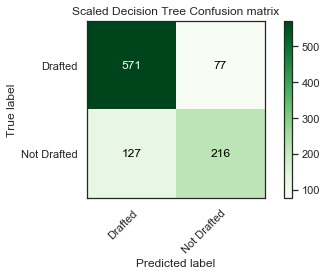

In [108]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Decision Tree Confusion matrix')

plt.show()

## Grid Search Decision Tree

In [63]:
dt_grid_param = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 3, 4, 5, 6],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(ctree, dt_grid_param, verbose=1, cv=3, n_jobs=-1)

dt_gs_results = dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    6.9s finished


In [66]:
# knn_gs_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])
# knn_gs_testing_score =  knn_grid_search.score(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = dt_grid_search.predict(X_test)

# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search.best_estimator_)
print("Besti Score Found:")
print(dt_grid_search.best_score_)

Accuracy Score : 0.7941473259334006
Precision Score : 0.738831615120275
Recall Score : 0.6268221574344023
F1 Score : 0.6782334384858044
Best Parameter Found:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best Estimator Found:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Besti Score Found:
0.8140228741919443


### Decision Tree Grid Search Confusion Matrix

Predicted    0    1  All
True                    
0          562   86  648
1          128  215  343
All        690  301  991


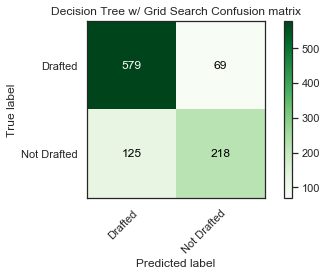

In [101]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Decision Tree w/ Grid Search Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

### Testing

In [200]:
test_pred_proba = ctree.predict_proba(X_test)

In [201]:
predictions = pd.DataFrame(test_pred_proba,index=X_test.index,columns = ['not drafted', 'drafted'])

In [202]:
success_failure = pd.merge(college_names, predictions, left_index=True, right_index=True, how='inner')

In [176]:
success_failure.index = success_failure.name

In [177]:
success_failure.drop(columns = ['name'], inplace= True )

In [178]:
success_failure

,not drafted,drafted
name,,
Alex Acker,0.109677,0.890323
Arron Afflalo,0.576923,0.423077
Cole Aldrich,1.000000,0.000000
Cliff Alexander,0.904762,0.095238
Al-Farouq Aminu,0.000000,1.000000
James Anderson,0.926448,0.073552
Kyle Anderson,0.794872,0.205128
Kyle Anderson,0.101695,0.898305
Ryan Anderson,0.926448,0.073552


## Misclassified Data

In [187]:
y_pred_proba = ctree.predict(college_nba[X.columns])

In [192]:
misclassified_id = [id for id in list(college_nba[college_nba['drafted'] != y_pred_proba].index) ]

In [233]:
misclassifieds = pd.merge(college_names, predictions, left_index=True, right_index=True, how='inner')

In [275]:
misclass_id = pd.DataFrame(misclassified_id)

In [276]:
misclass_id = misclass_id.rename(columns= {0: 'id'})

In [278]:
misclass_id = misclass_id.set_index('id')

In [281]:
ms = pd.merge(misclassified,misclass_id, left_index= True, right_index= True, how = 'inner')

In [283]:
ms_data = pd.merge(ms,X, left_index=True, right_index = True, how= 'inner')

In [314]:
test = ms_data[ms_data['drafted'] < .9]

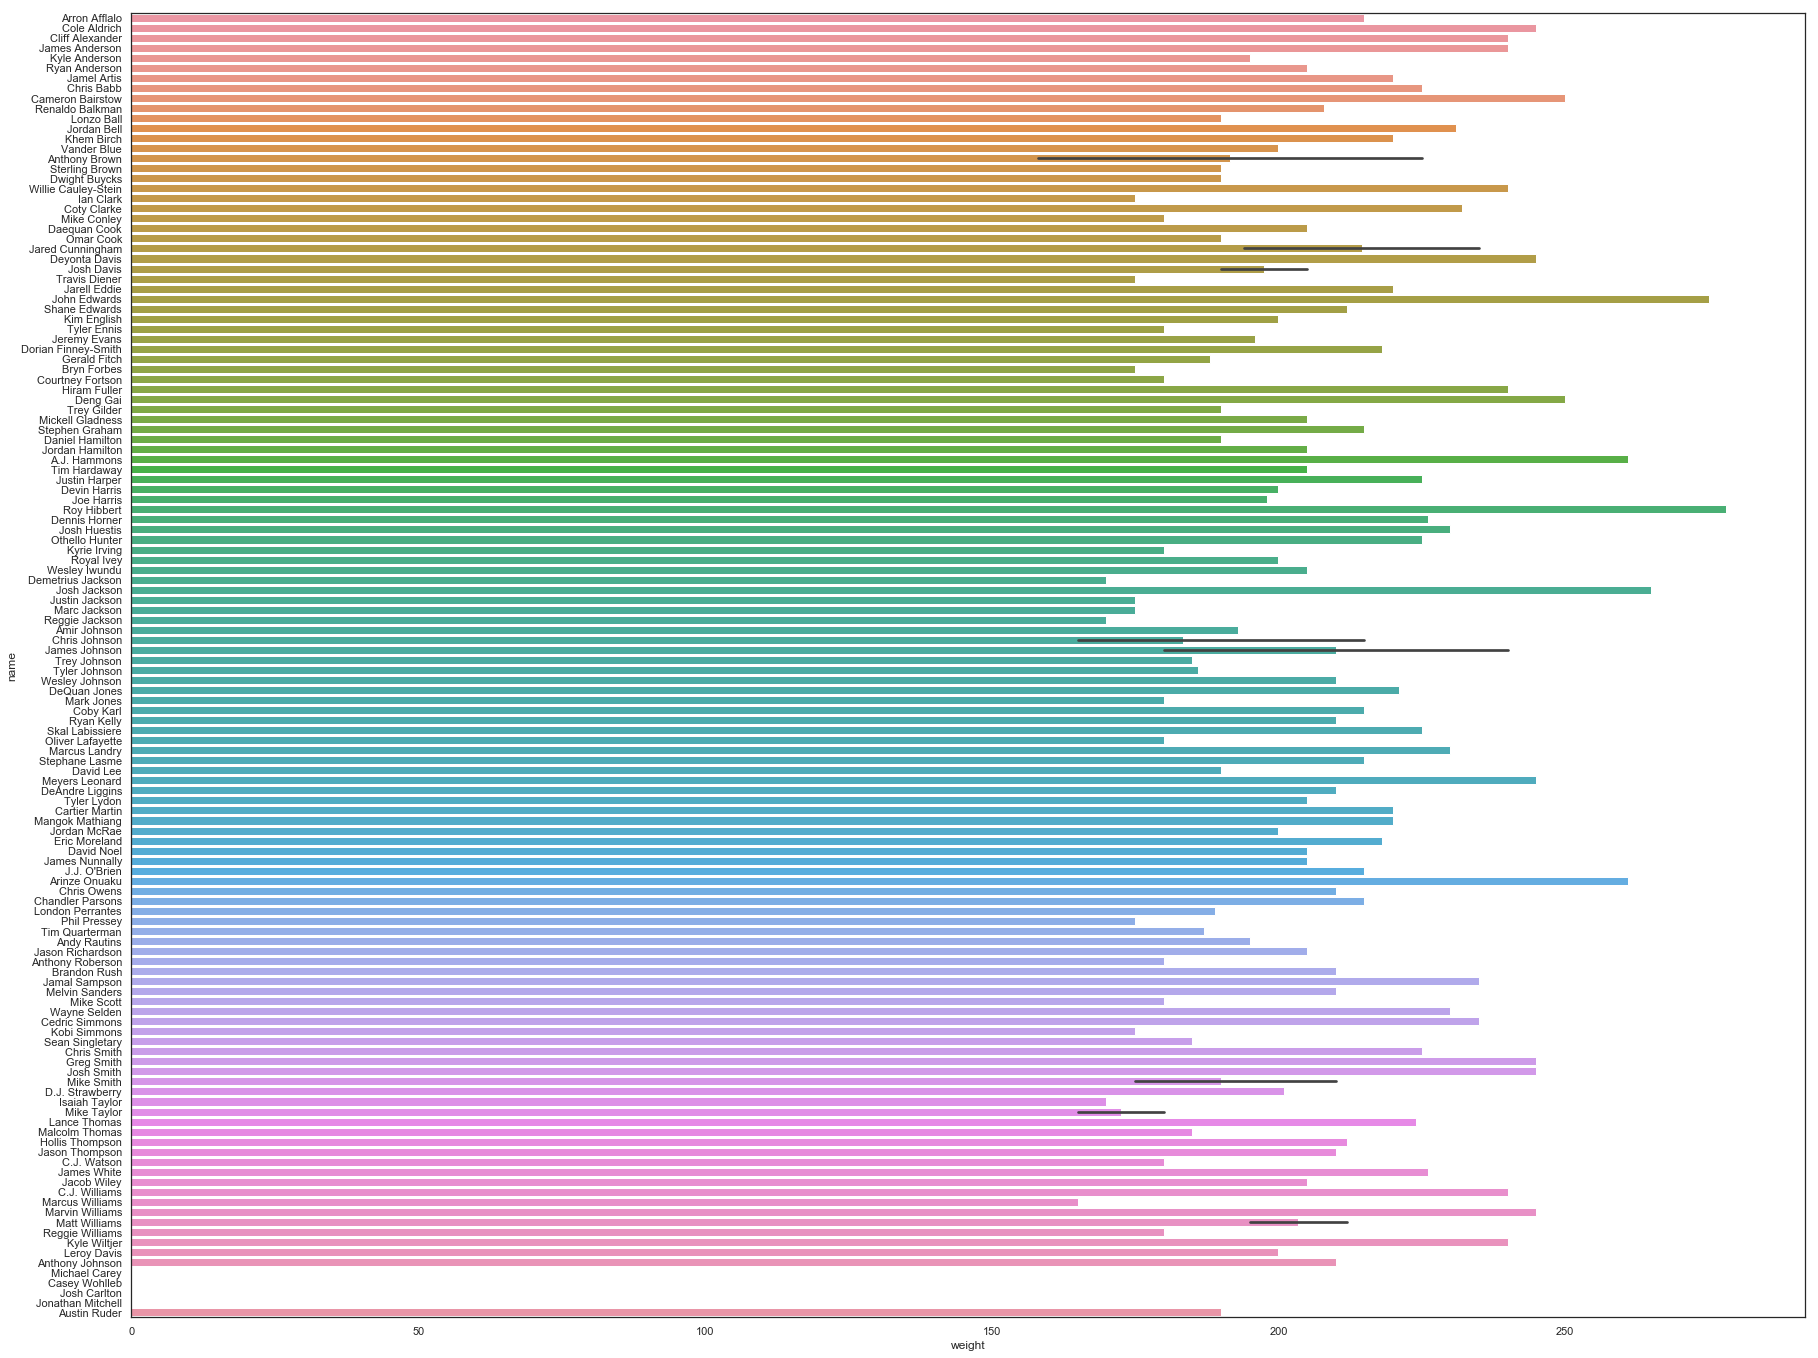

In [315]:
plt.figure(figsize=(30, 24))
sns.barplot(test['weight'], ms_data['name'],label="Count")
plt.show()

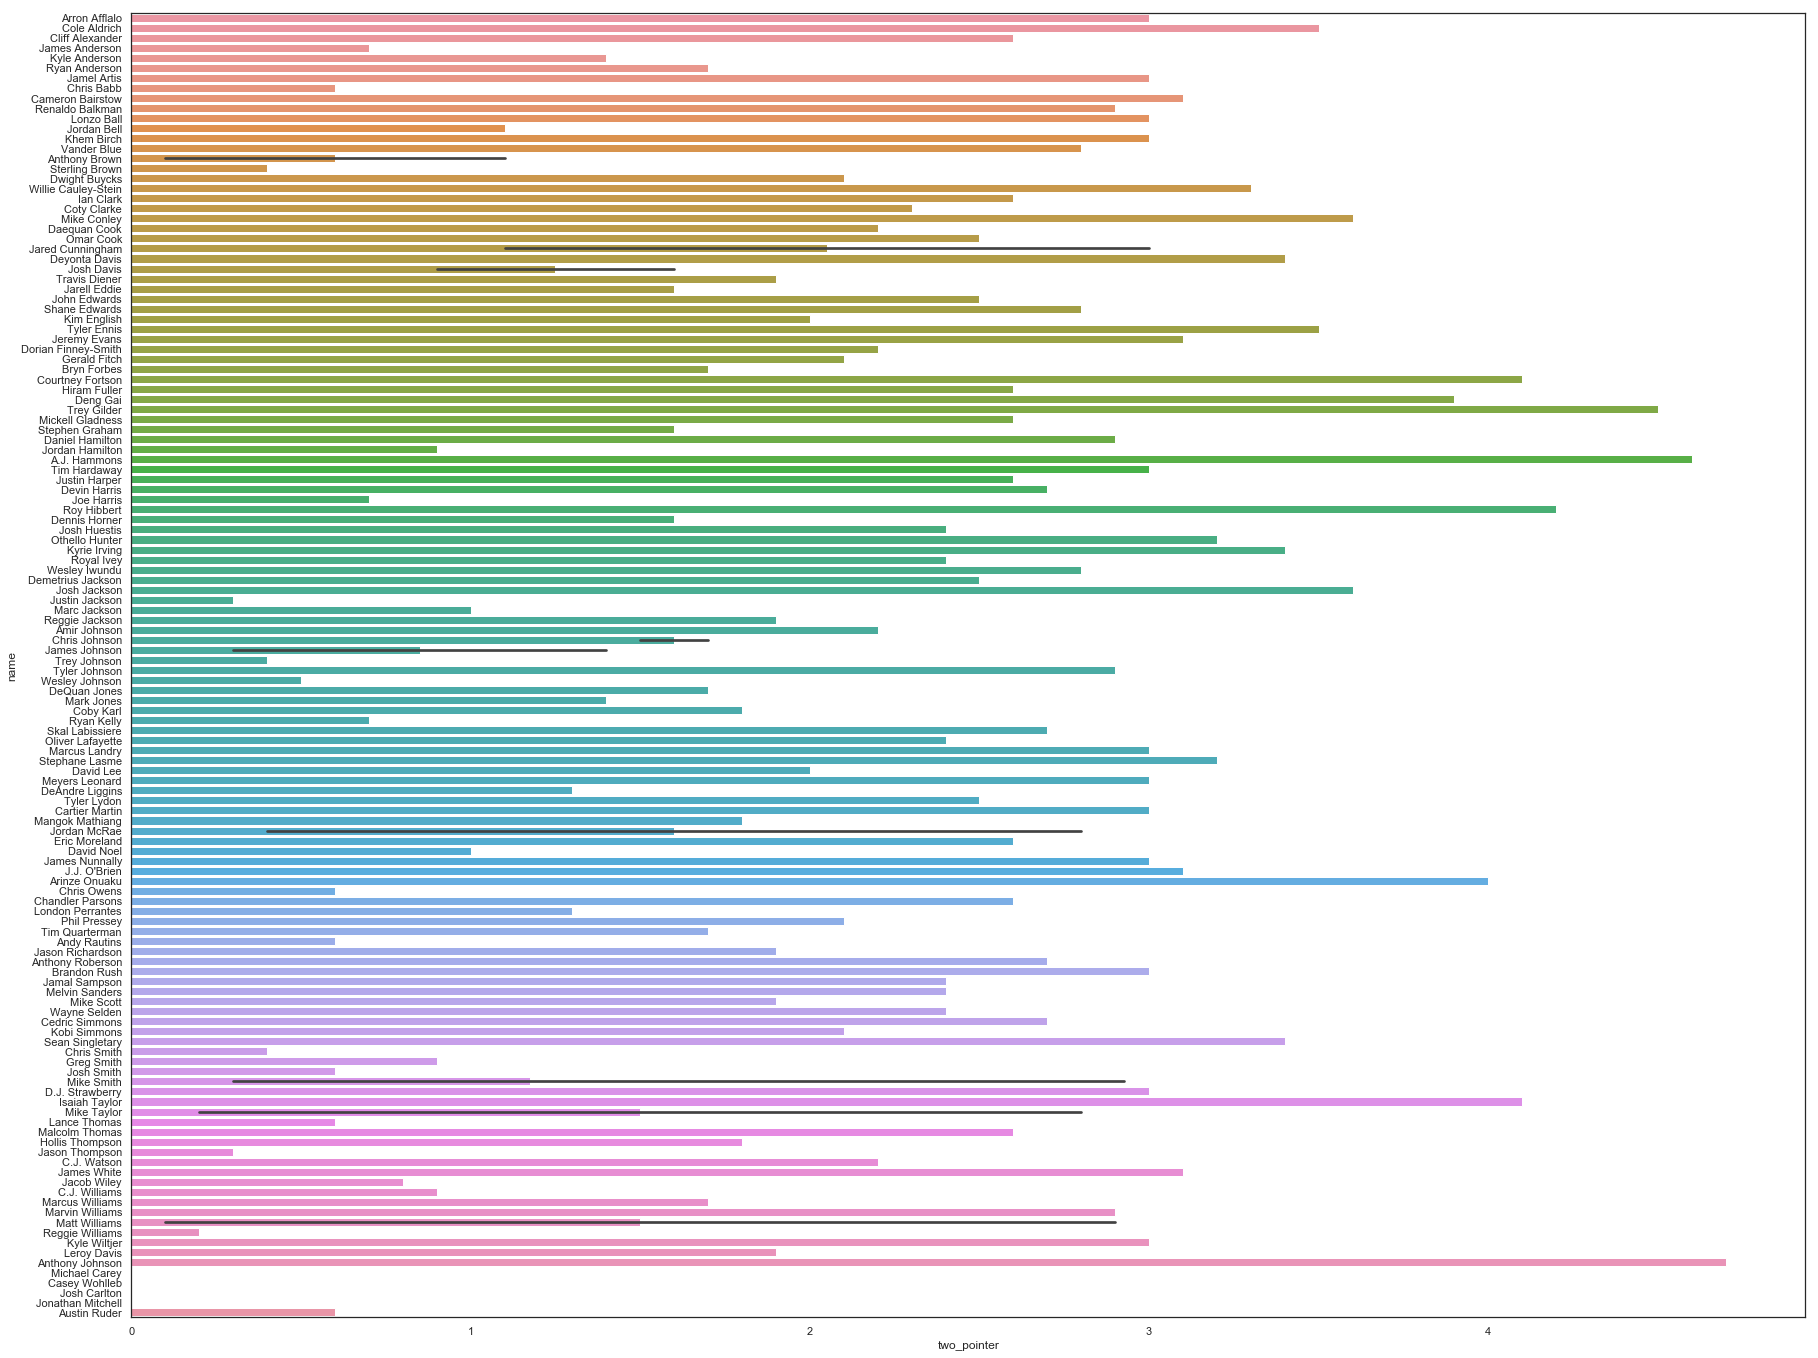

In [317]:
plt.figure(figsize=(30, 24))
sns.barplot(test['two_pointer'], ms_data['name'],label="Count")
plt.show()